In [1]:
# 全零、全一张量
import tensorflow as tf

x = tf.ones(shape=(2, 1))
print(x)

x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [2]:
# 随机张量
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

x = tf.random.uniform(shape=(3, 1), minval=0, maxval=1.)
print(x)

tf.Tensor(
[[-1.9706011]
 [-2.2350185]
 [ 1.781168 ]], shape=(3, 1), dtype=float32)
tf.Tensor(
[[0.87188125]
 [0.24921548]
 [0.32630277]], shape=(3, 1), dtype=float32)


In [19]:
# 变量
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

v.assign(tf.ones((3, 1)))
print(v)

v[0, 0].assign(3.)
print(v)

v.assign_add(tf.ones((3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 1.2827576 ],
       [-0.8334331 ],
       [-0.82507056]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>


In [23]:
# 求导
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


In [25]:
# 对常数张量使用GradientTape
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
    tape.watch(input_const)
    result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [27]:
# 二阶梯度
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)
print(speed)
print(acceleration)

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(9.8, shape=(), dtype=float32)


## 线性分类器

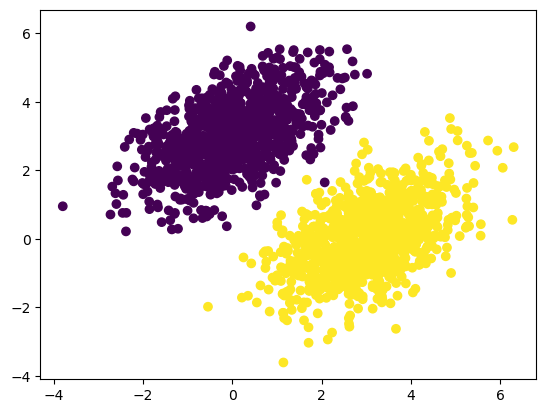

In [41]:
import numpy as np

# 1. 随机生成两个类别的点
num_samples_per_class = 1000
negative_sample = np.random.multivariate_normal(
    [0, 3],
    [[1, 0.5], [0.5, 1]],
    size = num_samples_per_class
)
positive_sample = np.random.multivariate_normal(
    [3, 0],
    [[1, 0.5], [0.5, 1]],
    size = num_samples_per_class
)
# 堆叠成(2000, 2)的数组 
inputs = np.vstack((negative_sample, positive_sample)).astype(np.float32)
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype='float32'),
                    np.ones((num_samples_per_class, 1), dtype='float32')))
# 绘制
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [42]:
# 创建线性分类器 prediction = W * input + b
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim, )))

# 前向传播函数
def model(inputs):
    return tf.matmul(inputs, W) + b

# 均方误差损失函数
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [44]:
# 训练
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    # loss相对于参数的梯度
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 2.6317
Loss at step 1: 0.5117
Loss at step 2: 0.1862
Loss at step 3: 0.1293
Loss at step 4: 0.1136
Loss at step 5: 0.1047
Loss at step 6: 0.0975
Loss at step 7: 0.0910
Loss at step 8: 0.0851
Loss at step 9: 0.0797
Loss at step 10: 0.0748
Loss at step 11: 0.0703
Loss at step 12: 0.0663
Loss at step 13: 0.0625
Loss at step 14: 0.0592
Loss at step 15: 0.0561
Loss at step 16: 0.0533
Loss at step 17: 0.0507
Loss at step 18: 0.0484
Loss at step 19: 0.0463
Loss at step 20: 0.0444
Loss at step 21: 0.0426
Loss at step 22: 0.0410
Loss at step 23: 0.0395
Loss at step 24: 0.0382
Loss at step 25: 0.0370
Loss at step 26: 0.0359
Loss at step 27: 0.0349
Loss at step 28: 0.0339
Loss at step 29: 0.0331
Loss at step 30: 0.0323
Loss at step 31: 0.0316
Loss at step 32: 0.0310
Loss at step 33: 0.0304
Loss at step 34: 0.0299
Loss at step 35: 0.0294
Loss at step 36: 0.0290
Loss at step 37: 0.0286
Loss at step 38: 0.0282
Loss at step 39: 0.0279


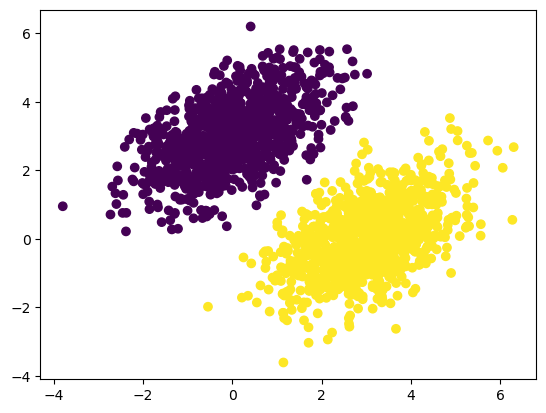

In [45]:
# 预测
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

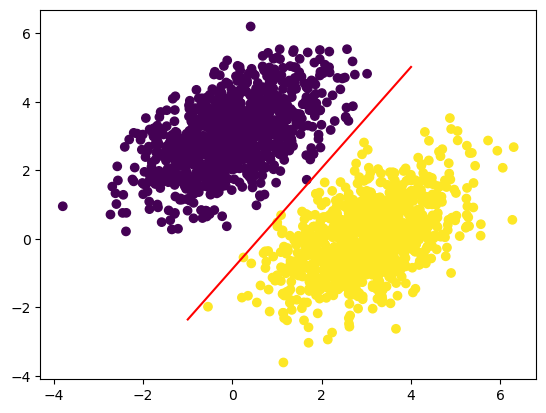

In [46]:
x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

## Keras API

In [48]:
# Dense层的实现，作为Layer的子类
from tensorflow import keras

class SimpleDense(keras.layers.Layer):
    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation
    
    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units), initializer='random_normal')
        self.b = self.add_weight(shape=(self.units, ), initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


In [49]:
# 自动推断
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(32)
])